# Ahmed Islam
# Assignment No: 12
# Hope to Skill
# Free Artificial intelligence Course

# Train Convolutional Neural Network on Fashion MNIST dataset

# Loading Required packages and Data

In [142]:
import numpy as np
import keras
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score

# Loading And Spliting the data into x_train, y_train, x_test and y_test.

In [143]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

# Display the sample images from x_train

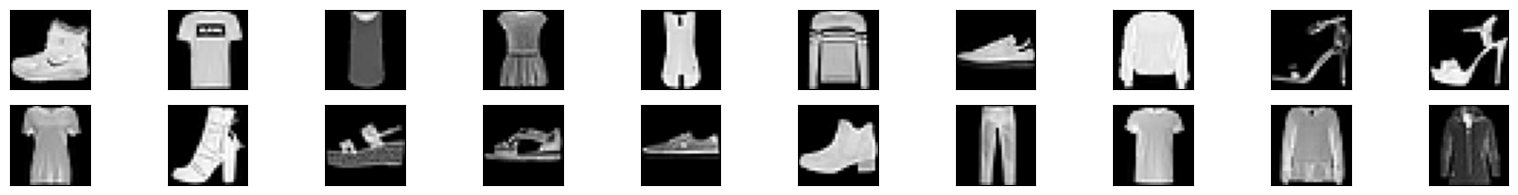

In [144]:
n=20

plt.figure(figsize=(20,6))
for i in range(n):
  ax= plt.subplot(5,10,i+1)

  plt.imshow(x_train[i].reshape(28,28))

  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


plt.show()

plt.close()


# Display the shape of x_train and y_train

In [145]:
#Dataset Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28)
y_train Shape : (60000,)
x_test Shape : (10000, 28, 28)
y_test Shape : (10000,)


# 3. Flatten the images
a. Reshape the images from 28x28 to 28x28x1.

In [148]:
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1)

# Scale the data
1. Convert the data into float 32 type
2. Scale the data by dividing x_train and y_train by 255


In [149]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

3. Display the shape of x_train and y_train after scaling

In [150]:
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)

x_train Shape : (60000, 28, 28, 1)
y_train Shape : (60000,)


# One Hot encoding

In [151]:
y_train= to_categorical(y_train, num_classes=10)
y_test= to_categorical(y_test, num_classes=10)

In [152]:
# Seeing updated Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28, 1)
y_train Shape : (60000, 10)
x_test Shape : (10000, 28, 28, 1)
y_test Shape : (10000, 10)


# Define the hyper parameters for the neural networks
1. No. of Epochs
2. Batch size
3. Input_size of image (Img_height, Img_width, No of channels)
4. No of convolutional layers
5. Output_size (output layers depending upon the number of classes)

In [153]:
epochs= 15

batch_size = 64

# Define the dimensions of the input image
img_rows, img_cols , channels = 28, 28, 1

# Define the number of filters for each layer of the CNN
filters= [6,32,64,128]

# Define the number of classes for classification
classes = 10

# 6. Define the structure of your neural network
1. No of Convolutional layers
2. Activation function for each convolutional layer
3. Flatten the 2D vectors into 1D vector for FCN
4. Number of output layer neurons and activation function
5. Compile the model and provide following arguments

*   Loss function
*   Optimizer
*   Metric

In [154]:
# Creating model

model= Sequential()

model.add(Conv2D(filters[0],(3,3), padding= 'same',\
                 activation= 'relu', input_shape=(img_rows,img_cols,channels)))

#For reducing image size
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (28 +3 -3)/2 = 14

model.add(Conv2D(filters[1], (3,3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[2], (3,3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2                               )))

model.add(Conv2D(filters[3], (3,3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(classes, activation= 'softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

# Model Summary

In [155]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 14, 14, 6)        0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 14, 14, 32)        1760      
                                                                 
 max_pooling2d_104 (MaxPooli  (None, 7, 7, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_105 (Conv2D)         (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_105 (MaxPooli  (None, 3, 3, 64)       

# Training Model

1. Fit the Model
2. Train the Model for 15 epochs and report the training accuracy.

In [156]:
# Training Model
history = model.fit(x_train, y_train, validation_split= 0.2, epochs=epochs, batch_size=64, verbose=1)

Epoch 1/15
750/750 [==============================] - 7s 7ms/step - loss: 0.6154 - accuracy: 0.7746 - val_loss: 0.4074 - val_accuracy: 0.8549
Epoch 2/15
750/750 [==============================] - 4s 5ms/step - loss: 0.3774 - accuracy: 0.8641 - val_loss: 0.3772 - val_accuracy: 0.8640
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.3211 - accuracy: 0.8835 - val_loss: 0.3195 - val_accuracy: 0.8816
Epoch 4/15
750/750 [==============================] - 4s 6ms/step - loss: 0.2912 - accuracy: 0.8945 - val_loss: 0.3159 - val_accuracy: 0.8849
Epoch 5/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2650 - accuracy: 0.9028 - val_loss: 0.2869 - val_accuracy: 0.8946
Epoch 6/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2448 - accuracy: 0.9101 - val_loss: 0.2565 - val_accuracy: 0.9071
Epoch 7/15
750/750 [==============================] - 4s 6ms/step - loss: 0.2244 - accuracy: 0.9178 - val_loss: 0.2589 - val_accuracy: 0.9056
Epoch 

# Training and Testing Accuracy of The model

In [157]:
y_pred_prob= model.predict(x_test, verbose=0)
y_pred= np.where(y_pred_prob >0.5, 1, 0)

test_accuracy= round(accuracy_score(y_pred,y_test)*100,2)

In [158]:
# Compare training and testing accuracy
train_accuracy = round(history.history['accuracy'][-1]*100,2)  # Get the last epoch's training accuracy
print(f"Training accuracy: {train_accuracy}% , Testing accuracy: {test_accuracy}%")

Training accuracy: 95.37% , Testing accuracy: 90.28%


# Display the predicted labels along the input image.

In [159]:
mask= range(40,100)

x_valid = x_test[50:70]
actual_labels= y_test[50:70]

y_pred_prob_valid= model.predict(x_valid)
y_pred_valid= np.where(y_pred_prob_valid>0.5,1,0)

1/1 [==============================] - 0s 19ms/step


In [160]:
label_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

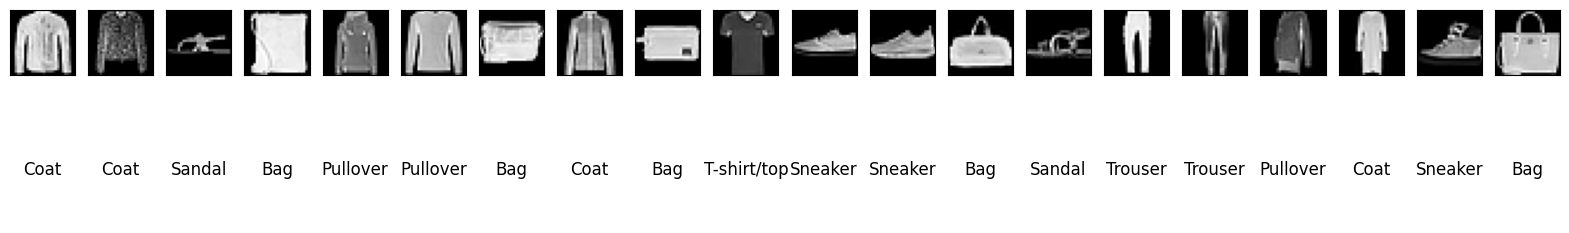

In [161]:
# Set up a figure to display images
n = len(x_valid)
plt.figure(figsize=(20, 8))

for i in range(n):
    # Display the original image
    ax = plt.subplot(5, n, i + 1)
    plt.imshow(x_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted label
    predicted_digit = np.argmax(y_pred_prob_valid[i])
    predicted_label = label_mapping[predicted_digit]
    ax = plt.subplot(5, n, i + 1 + n)
    plt.text(0.5, 0.5, predicted_label, fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()

